Processing fold # 1
Processing fold # 2
Processing fold # 3
Processing fold # 4
Processing fold # 1
Processing fold # 2
Processing fold # 3
Processing fold # 4


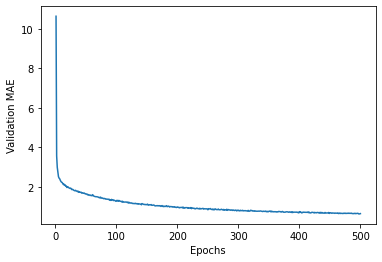

In [ ]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline 

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

def build_model():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(train_data.shape[1], )),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


k = 4
num_val_samples = train_data.shape[0] // 4
num_epochs = 50
all_scores = []

for i in range(k):
    print("Processing fold #", i + 1)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
     
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,
                        verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing fold #", i + 1)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
     
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,
                        verbose=0)

    mae_history = history.history["mae"]
    all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([ x[i] for x in all_mae_histories ]) for i in range(num_epochs)
]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()